In [1]:
# Import pandas for manipulating numerical tables
import pandas as pd

# Import numpy for numerical calculations
import numpy as np

# Import matplotlib for plotting data
import matplotlib.pyplot as plt
#%matplotlib inline

# Import scipy-stats for statistical analysis and outlier detection
from scipy import stats as st

# Import pylab for plots
import pylab

# Import statistics for statistical calculations
import statistics

# Import for plotting
import plotnine as p9

In [2]:
# Importing the churn dataset
df = pd.read_csv('C:/users/eric7/D207/d207_churn.csv')

In [3]:
# Just checking to see if the data is there
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [4]:
# Check shape of df
print(df.shape)
# 10000 rows or instances and 52 columns or variables

(10000, 50)


In [5]:
# Check df info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [6]:
# Check for duplicates
df.duplicated().sum()

0

In [7]:
# Create a copy of df to preserve original
df1 = df.copy()

In [8]:
# Checking variables unique values for validity
print(df1['Churn'].sort_values().unique())

['No' 'Yes']


In [9]:
# Checking variables unique values for validity
print(df1['Tenure'].sort_values().unique())

[ 1.00025934  1.005104    1.0185196  ... 71.99373    71.99418
 71.99928   ]


In [10]:
# Checking variables unique values for validity
print(df1['MonthlyCharge'].sort_values().unique())

[ 79.97886   79.978861  82.496547  82.49655   92.45514   92.455141
  92.48802   92.488023  92.5018    94.972827  94.97283   95.005709
  95.00571   95.019486  95.01949  102.4746   102.474625 104.962874
 104.9629   104.9643   104.964303 104.97808  104.9781   104.9923
 104.992311 105.010962 105.011    107.48056  107.4806   107.481989
 107.482    107.495766 107.4958   107.5286   107.528648 112.4551
 112.455141 112.484375 112.4844   114.9509   114.950905 114.965789
 114.9658   114.9728   114.972827 114.983787 114.9838   114.997564
 114.9976   115.002061 115.0021   117.439154 117.4392   117.468591
 117.4686   117.472    117.472036 117.483475 117.4835   117.4858
 117.485813 117.4872   117.487242 117.5015   117.5152   117.51525
 119.9568   119.95684  119.9897   119.989722 120.003499 120.0035
 120.0049   120.004928 124.960655 124.9607   124.9643   124.964303
 124.97808  124.9781   124.9935   124.993537 125.0073   125.007314
 127.442069 127.4421   127.4586   127.458638 127.460067 127.4601
 127.4

In [11]:
# Checking variables unique values for validity
print(df1['PaperlessBilling'].sort_values().unique())

['No' 'Yes']


In [12]:
# Get statistics of the variable
df1['Churn'].describe()

count     10000
unique        2
top          No
freq       7350
Name: Churn, dtype: object

In [13]:
# Get statistics of the variable
df1['Tenure'].describe()

count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: Tenure, dtype: float64

In [14]:
# Get statistics of the variable
df1['MonthlyCharge'].describe()

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64

In [15]:
# Get statistics of the variable
df1['PaperlessBilling'].describe()

count     10000
unique        2
top         Yes
freq       5882
Name: PaperlessBilling, dtype: object

In [16]:
df1.shape

(10000, 50)

In [17]:
# Create a new variable for encoding
df1['Churn_numeric'] = df1['Churn']

In [18]:
# Create a dictionary for converting categorical values to numeric
dict_churn = {'Churn_numeric':
             {'No': 0, 'Yes': 1}}

In [19]:
# Put the new encoded variable into the dataframe
df1.replace(dict_churn, inplace=True)

In [20]:
# Check new shape for verification
df1.shape

(10000, 51)

In [21]:
# Create a new variable for encoding
df1['PaperlessBilling_numeric'] = df1['PaperlessBilling']

In [22]:
# Create a dictionary for converting categorical values to numeric
dict_paperlessbilling = {'PaperlessBilling_numeric':
             {'No': 0, 'Yes': 1}}

In [23]:
# Put the new encoded variable into the dataframe
df1.replace(dict_paperlessbilling, inplace=True)

In [24]:
# Check new shape for verification
df1.shape

(10000, 52)

In [25]:
x = df1['MonthlyCharge']
y = df1['Churn_numeric']

var_x = x.var(ddof=1)
var_y = y.var(ddof=1)

# standard deviation
s = np.sqrt((var_x + var_y)/2)
#print(s)

print('The mean of "MonthlyCharge" is: ', statistics.mean(x))
print('The mean of "Churn_numeric" is: ', statistics.mean(y))

N = 10000
t = (statistics.mean(x) - statistics.mean(y)) / (s*np.sqrt(2/N))

df = 2*N - 2

p = 1 - st.t.cdf(t,df=df)

print('Standard Deviation: ' + str(s))
print('The t-value is ' + str(t))
print('The p-value is ' + str(2*p))

The mean of "MonthlyCharge" is:  172.6248162079
The mean of "Churn_numeric" is:  0.265
Standard Deviation: 30.366956762317102
The t-value is 401.34675265159336
The p-value is 0.0


In [26]:
# Importing the churn dataset and indexing 'Churn'
data = pd.read_csv('C:/users/eric7/D207/d207_churn.csv', index_col = 'Churn')

In [27]:
# Independent t-test--Verify previous results
first = data.loc[['Yes'], ['MonthlyCharge']]
second = data.loc[['No'], ['MonthlyCharge']]
t_statistic, p_value = st.ttest_ind(first, second, equal_var = False)

print('t-statistic: ', t_statistic)
print('p-value: ', p_value)

t-statistic:  [39.28778644]
p-value:  [1.78239417e-290]


In [28]:
x = df1['Tenure']
y = df1['PaperlessBilling_numeric']

var_x = x.var(ddof=1)
var_y = y.var(ddof=1)

# standard deviation
s = np.sqrt((var_x + var_y)/2)
#print(s)

print('The mean of "Tenure" is: ', statistics.mean(x))
print('The mean of "PaperlessBilling_numeric" is: ', statistics.mean(y))

N = 10000
t = (statistics.mean(x) - statistics.mean(y)) / (s*np.sqrt(2/N))

df = 2*N - 2

p = 1 - st.t.cdf(t,df=df)

print('Standard Deviation: ' + str(s))
print('The t-value is ' + str(t))
print('The p-value is ' + str(2*p))

The mean of "Tenure" is:  34.5261880889938
The mean of "PaperlessBilling_numeric" is:  0.5882
Standard Deviation: 18.701307523819054
The t-value is 128.3214100778293
The p-value is 0.0


In [29]:
# Importing the churn dataset and indexing 'Churn'
data = pd.read_csv('C:/users/eric7/D207/d207_churn.csv', index_col = 'PaperlessBilling')

In [30]:
# Independent t-test--Verify previous results
first = data.loc[['Yes'], ['Tenure']]
second = data.loc[['No'], ['Tenure']]
t_statistic, p_value = st.ttest_ind(first, second, equal_var = False)

print('t-statistic: ', t_statistic)
print('p-value: ', p_value)

t-statistic:  [-0.0654089]
p-value:  [0.94784991]


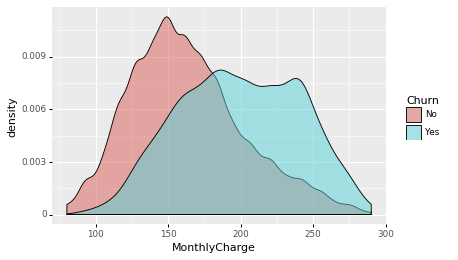

In [31]:
print(p9.ggplot(df1) + p9.aes(x='MonthlyCharge', fill='Churn')
     + p9.geom_density(alpha=0.5))

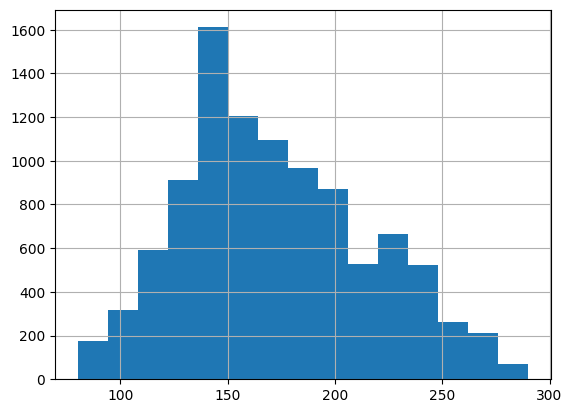

In [32]:
df1['MonthlyCharge'].hist(bins=15)
plt.show()

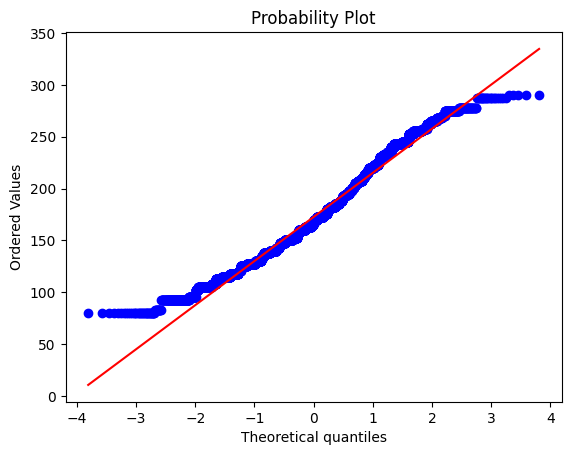

In [33]:
#qq plot
import pylab
st.probplot(df1['MonthlyCharge'], dist='norm', plot=pylab)
pylab.show()

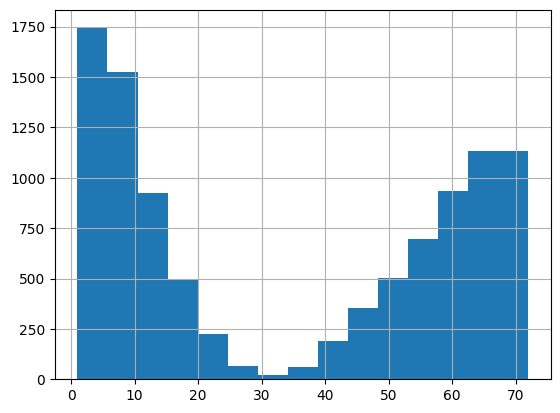

In [34]:
df1['Tenure'].hist(bins=15)
plt.show()

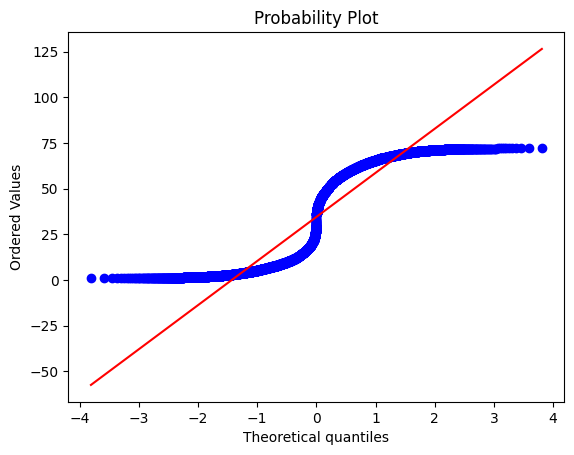

In [35]:
#qq plot
import pylab
st.probplot(df1['Tenure'], dist='norm', plot=pylab)
pylab.show()

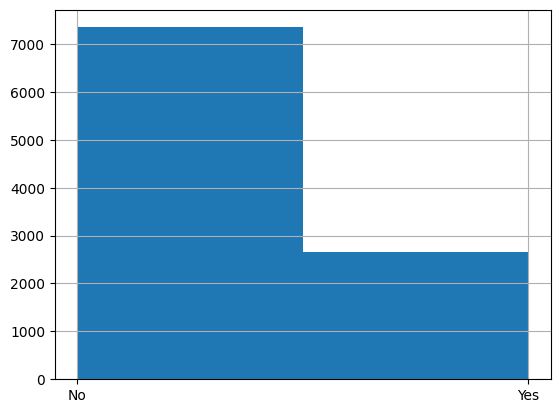

In [36]:
df1['Churn'].hist(bins=2)
plt.show()

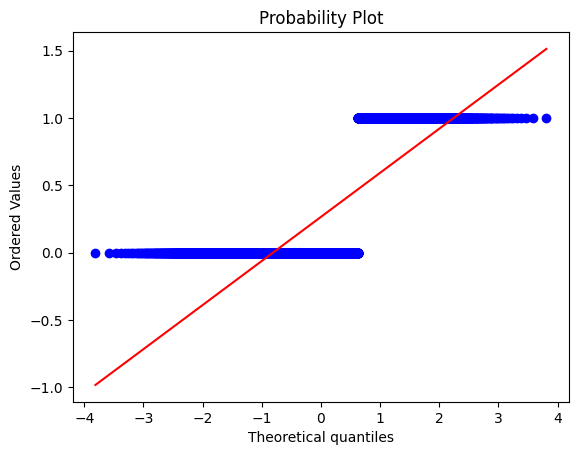

In [37]:
#qq plot
import pylab
st.probplot(df1['Churn_numeric'], dist='norm', plot=pylab)
pylab.show()

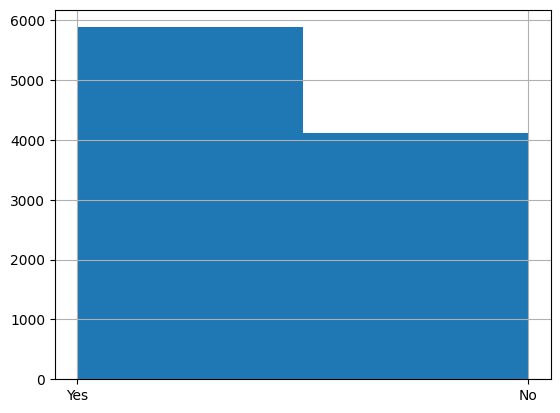

In [38]:
df1['PaperlessBilling'].hist(bins=2)
plt.show()

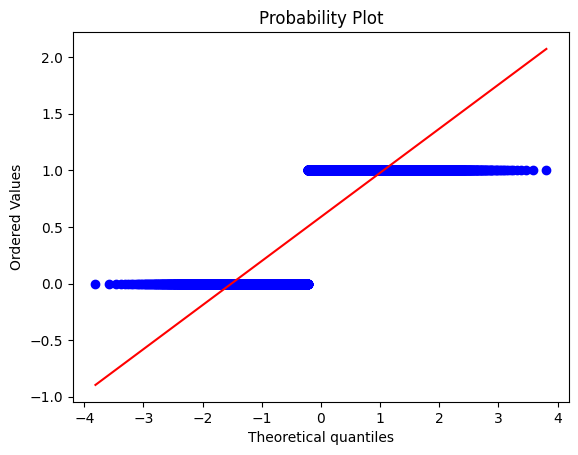

In [39]:
#qq plot
import pylab
st.probplot(df1['PaperlessBilling_numeric'], dist='norm', plot=pylab)
pylab.show()

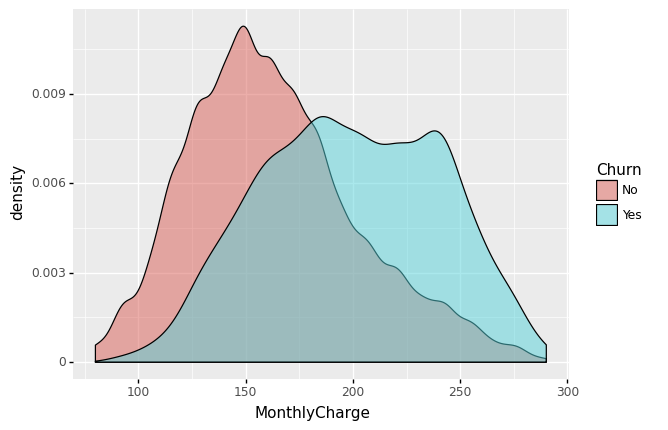

In [40]:
print(p9.ggplot(df1) + p9.aes(x='MonthlyCharge', fill='Churn')
     + p9.geom_density(alpha=0.5))

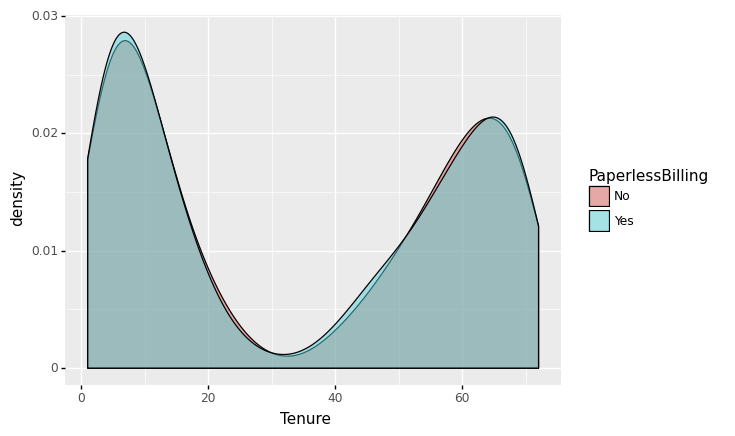

In [41]:
print(p9.ggplot(df1) + p9.aes(x='Tenure', fill='PaperlessBilling')
     + p9.geom_density(alpha=0.5))

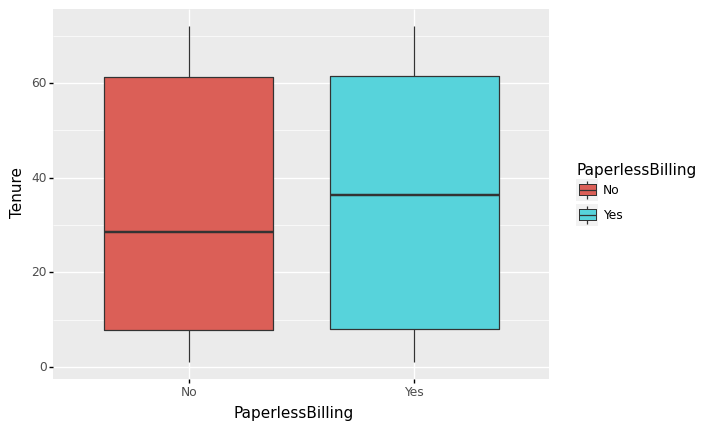

In [42]:
print(p9.ggplot(df1)+ p9.aes(x='PaperlessBilling', y='Tenure',
                            fill='PaperlessBilling')+ p9.geom_boxplot())

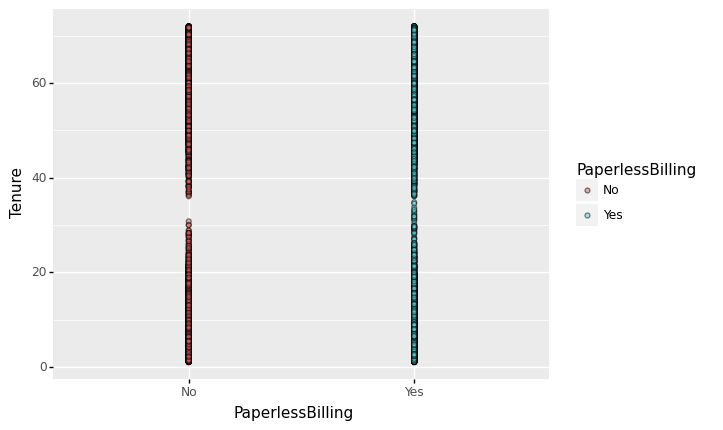

In [43]:
print(p9.ggplot(df1)+ p9.aes(x='PaperlessBilling', y='Tenure',
                            fill='PaperlessBilling')+ p9.geom_point(alpha=0.5))

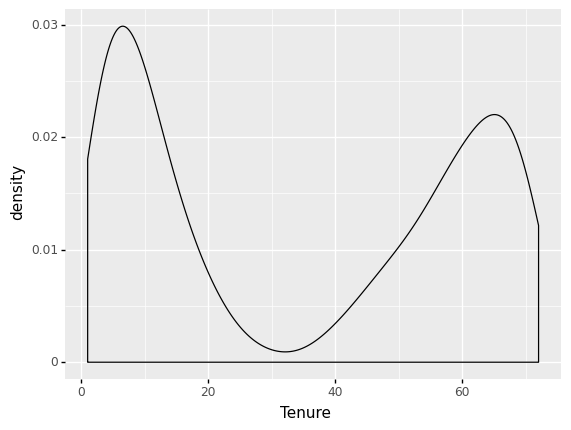

In [44]:
print(p9.ggplot(df1)+ p9.aes('Tenure')+ p9.geom_density(alpha=0.5))

In [45]:
# Perform the two-sample t-test
t_result= st.ttest_ind(df1['Tenure'], df1['MonthlyCharge'])
print(t_result)

Ttest_indResult(statistic=-273.8335998508745, pvalue=0.0)


In [46]:
# Test significance
alpha= 0.00000000000000000000000000000000000000000000001
if (t_result[1] < alpha):
    print("Significant difference")
else: print("No significant difference found")

Significant difference


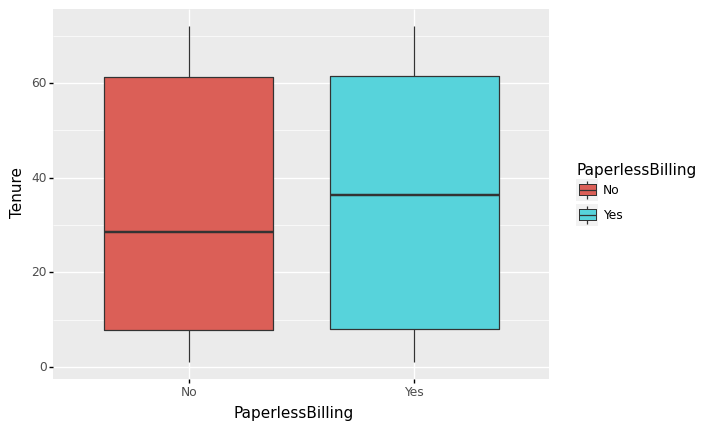

In [47]:
print(p9.ggplot(df1) + p9.aes(x='PaperlessBilling', y='Tenure', fill='PaperlessBilling')
     + p9.geom_boxplot())

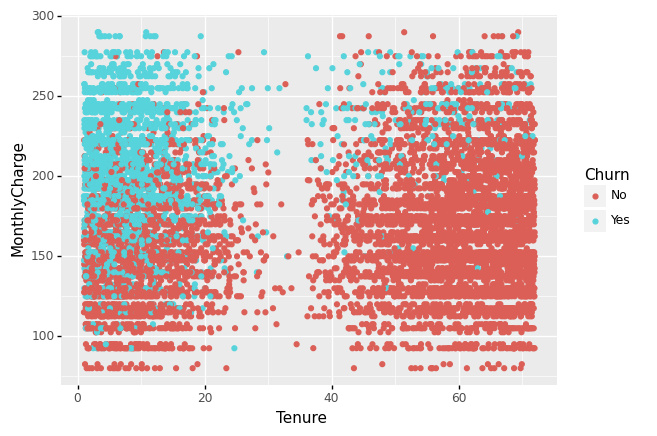

In [48]:
print(p9.ggplot(df1) + p9.aes(x='Tenure', y='MonthlyCharge', color='Churn')
     + p9.geom_point())